In [2]:
import pandas as pd
from selenium import webdriver
browser = webdriver.Chrome("chromedriver.exe")

WebDriverException: Message: 'chromedriver.exe' executable needs to be in PATH. Please see https://sites.google.com/a/chromium.org/chromedriver/home


In [ ]:
url = "https://in.linkedin.com/jobs/search?keywords=data+science&location=&locationId=PLACES.in.16-0"
browser.get(url)

In [3]:
parent = browser.find_elements_by_css_selector("li.jobs-search-result-item")
len(parent)

NameError: name 'browser' is not defined

In [10]:
import pandas as pd

In [11]:
job_df = pd.DataFrame()
for job in parent:
    try:
        designation = job.find_element_by_css_selector("h3.listed-job-posting__title").text
    except:
        designation = None
    try:
        company_name = job.find_element_by_css_selector("h4.listed-job-posting__company").text
    except:
        company_name = None
    try:
        location = job.find_element_by_css_selector("p.listed-job-posting__location").text
    except:
        location = None
    try:
        date_post = job.find_element_by_css_selector("span.posted-time-ago__text").text
    except:
        date_post = None
    try:
        job_desc = job.find_element_by_css_selector("p.listed-job-posting__description").text
    except:
        job_desc = None
        
    job_dic = pd.Series({"designation":designation,"company_name":company_name,"location":location,
                        "date_post":date_post,"job_desc":job_desc})
    job_df = job_df.append(job_dic,ignore_index=True)

In [12]:
job_df.head()

,company_name,date_post,designation,job_desc,location
0,Amazon,55 minutes ago,Senior Data Scientist,"If you have experience with AI, including buil...",Bengaluru
1,Gambit Sports,2 weeks ago,Data Scientist,We are looking for a data scientist who will b...,Anekal
2,"Group 42, Inc.",1 month ago,Data Science Engineer,2+ years' experience in AI and ML algorithm de...,Bengaluru
3,IBM India Private Limited,5 days ago,Data Science Specialist,Required Technical and Professional Expertise ...,Bengaluru
4,Accenture in India,1 day ago,Data Science Specialist,This role will be based in Bangalore.We are lo...,Bengaluru


### 2. Jobs are listed in multiple pages. After scraping one page, make sure you click on the next button to load the next page. You need not load all the pages. It is okay to stop your iteration after scraping 5 pages.

In [ ]:
import time
job_df2 = pd.DataFrame()

while True:
    parents = browser.find_elements_by_css_selector("li.jobs-search-result-item")
    
    for job in parents:
        try:
            designation = job.find_element_by_css_selector("h3.listed-job-posting__title").text
        except:
            designation = None
        try:
            company_name = job.find_element_by_css_selector("h4.listed-job-posting__company").text
        except:
            company_name = None
        try:
            location = job.find_element_by_css_selector("p.listed-job-posting__location").text
        except:
            location = None
        try:
            date_post = job.find_element_by_css_selector("span.posted-time-ago__text").text
        except:
            date_post = None
        try:
            job_desc = job.find_element_by_css_selector("p.listed-job-posting__description").text
        except:
            job_desc = None

        job_dic = pd.Series({"designation":designation,"company_name":company_name,"location":location,
                            "date_post":date_post,"job_desc":job_desc})
        job_df2 = job_df2.append(job_dic,ignore_index=True)

    try:
        browser.find_element_by_css_selector("a.pagination__button ").click()
        time.sleep(2)
    except:
        break

# 3. Create a word cloud using job description

In [15]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

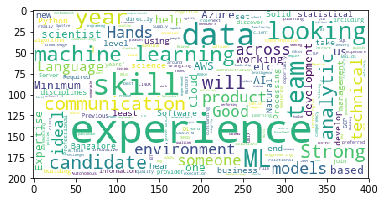

In [16]:
sent = "".join(job_df.job_desc)

wc = WordCloud(max_font_size=50,background_color="white").generate(sent)
plt.imshow(wc)

# 4. Identify company wise no. of jobs posted and identify top 5 companies??

In [17]:
job_df.groupby("company_name").size()

company_name
Accenture                     1
Accenture in India            1
Allstate India                1
Amazon                        1
Autodesk                      1
British Telecommunications    1
FICO                          1
Gambit Sports                 1
Genpact                       1
Group 42, Inc.                1
HP ENTERPRISE SERVICES        1
IBM India Private Limited     1
JDA Software                  1
Koinex.in                     1
Lowe's India                  1
Radial HR Solutions           1
Randstad India                1
Realtime signals              1
RxLogix                       1
Sling Media                   1
Sonata Software               1
Superior Talent Resource      1
Tredence Inc.                 1
Triquetro Infotech Pvt Ltd    1
ZoomTail                      1
dtype: int64

# 5. Identify location wise no. of jobs posted and identify top 3 location??

In [18]:
job_df.groupby("location").size()

location
Anekal        4
Bengaluru    21
dtype: int64